# Crowdsourcing salient information from news and tweets

This repository contains preliminary work results for identifying linguistic features for novelty detection in news and tweets. We report here results of a crowdsourcing pipeline, as well as comparisons between the output of Natural Language Processing (NLP) tools and crowdsourcing. The main focus of this dataset if to gather initial relevant and novel information insights, with regard to the event of "<b><a href="https://en.wikipedia.org/wiki/Whaling">whaling</a></b>". 

All the crowdsourcing experiments were performed through the CrowdTruth platform, while the results were processed and analyzed using the CrowdTruth methodology and metrics. For more information, check the <b><a href="http://crowdtruth.org/">CrowdTruth</a></b> website.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

spaceLabelingSnippetsRelevance = pd.read_csv('aggregate/spaceLabeling_relevantSnippets&Mentions.csv')

relevantSnippets = spaceLabelingSnippetsRelevance.loc[spaceLabelingSnippetsRelevance['Snippet Relevance Score'] != 0]

relevantOverlappingSnippets = relevantSnippets.loc[relevantSnippets['Overlapping Snippet'] == 1]
relevantNonOverlappingSnippets = relevantSnippets.loc[relevantSnippets['Overlapping Snippet'] == 0]

orderedOverlapping = relevantOverlappingSnippets.sort(['Snippet Relevance Score'], ascending=[False])
orderedNonOverlapping = relevantNonOverlappingSnippets.sort(['Snippet Relevance Score'], ascending=[True])

orderedMentionsOverlapping = relevantOverlappingSnippets.sort(['Number of Relevant Mentions'], ascending=[False])
orderedMentionsNonOverlapping = relevantNonOverlappingSnippets.sort(['Number of Relevant Mentions'], ascending=[True])

frames = [orderedOverlapping, orderedNonOverlapping]
result = pd.concat(frames)

result = result.reset_index(drop=True)
result.reset_index(inplace=True)

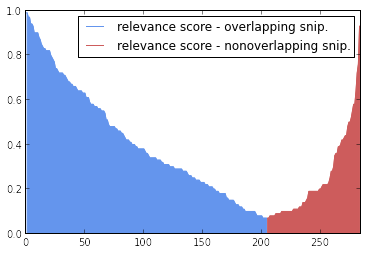

In [4]:
result['subset'] = np.select([result['Overlapping Snippet'] == 1, result['Overlapping Snippet'] == 0], ['relevance score - overlapping snip.', 'relevance score - nonoverlapping snip.'], -1)
for color, label in zip(['cornflowerblue', 'indianred'], ['relevance score - overlapping snip.', 'relevance score - nonoverlapping snip.', -1]):
    subset = result[result['subset'] == label]
    plt.plot(subset['index'], subset['Snippet Relevance Score'], c=color, label=str(label))
    plt.fill_between(subset['index'], subset['Snippet Relevance Score'], 0, where=subset['index'], color=color)
plt.xlim(0, len(result['index']))
plt.legend()


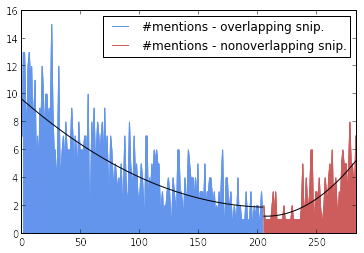

In [5]:
result['subset'] = np.select([result['Overlapping Snippet'] == 1, result['Overlapping Snippet'] == 0], ['#mentions - overlapping snip.', '#mentions - nonoverlapping snip.'], -1)
for color, label in zip(['cornflowerblue', 'indianred'], ['#mentions - overlapping snip.', '#mentions - nonoverlapping snip.', -1]):
    subset = result[result['subset'] == label]
    plt.plot(subset['index'], subset['Number of Relevant Mentions'], c=color, label=str(label))
    plt.fill_between(subset['index'], subset['Number of Relevant Mentions'], 0, where=subset['index'], color=color)
    z = np.polyfit(subset['index'],subset['Number of Relevant Mentions'],2)
    p = np.poly1d(z)
    plt.plot(subset['index'],subset['Number of Relevant Mentions'], color, subset['index'], p(subset['index']),'k-')
plt.xlim(0, len(result['index']))
plt.legend()

In [6]:
sentimentAnalysisSnippets = pd.read_csv('aggregate/sentimentAnalysis_newsArticles.csv')

overallSentiment = sentimentAnalysisSnippets.loc[sentimentAnalysisSnippets['Overall Sentiment-Intensity'] == 1]
overallSentiment.sort(['Positive Sentiment', 'Negative Sentiment'], ascending=[False, True])
overallSentiment

,Index,Job Id,Unit Id,Title Id,Title,Snippet Id,Snippet,Overlapping Snippet,Snippet Relevance Score,Number of Relevant Mentions,Overall Sentiment-Intensity,Relevant Mention,Relevant Mention Score,Positive Sentiment,Negative Sentiment,Neutral Sentiment,High Intensity,Low Intensity,Medium Intensity
0,1,91,6,123451,"One day after attempted rescue, six stranded w...",9-Over,The other four whales rescued Tuesday are stil...,1,NaN,2,1,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.514496,0.857493
1,2,92,49,120875,500 stranded melon-headed whales rescued in Ph...,5-Over,Using dozens of fishing boats with machines sh...,1,NaN,4,1,NaN,NaN,1.000000,0.000000,0.000000,0.624695,0.000000,0.780869
2,3,93,266,29729,Southern Ocean whale slaughter to resume,10-NonOver,"`` And for that very reason , we 're doing our...",0,NaN,1,1,NaN,NaN,1.000000,0.000000,0.000000,0.316228,0.000000,0.948683
3,4,96,17,31648,"Greenpeace, Sea Shepherds end Southern Ocean w...",10-Over,"`` For a month now we have dogged , delayed an...",1,NaN,6,1,NaN,NaN,1.000000,0.000000,0.000000,0.218218,0.436436,0.872872
4,5,92,145,25940,"Japan to hunt 950 whales for ""scientific resea...",31-Over,`` There 's also increasing evidence that non-...,1,NaN,3,1,NaN,NaN,0.989949,0.000000,0.141421,0.182574,0.912871,0.365148
5,6,93,263,18187,Greenpeace tries to thwart Chesapeake Bay fish...,15-Over,"The Chesapeake Bay Foundation , a not-for-prof...",1,NaN,3,1,NaN,NaN,0.989949,0.000000,0.141421,0.000000,0.857493,0.514496
6,7,96,160,31479,Rescue teams try to save London whale,9-Over,They hope to be able to release the whale in a...,1,NaN,8,1,NaN,NaN,0.989949,0.000000,0.141421,0.000000,0.707107,0.707107
7,8,97,180,28661,Greenpeace activists clash with Japanese whali...,8-Over,In inflatables carrying banners which read `` ...,1,NaN,5,1,NaN,NaN,0.986394,0.000000,0.164399,0.727607,0.485071,0.485071
8,9,92,233,7290,"13 pilot whales returning to sea, off Western ...",8-Over,"One CALM officer , Neil Taylor , told ABC News...",1,NaN,1,1,NaN,NaN,0.986394,0.164399,0.000000,0.218218,0.872872,0.436436
9,10,96,21,31648,"Greenpeace, Sea Shepherds end Southern Ocean w...",13-Over,Hideki Moronuki from Japan 's Fisheries Agency...,1,NaN,7,1,NaN,NaN,0.986394,0.164399,0.000000,0.192450,0.192450,0.962250


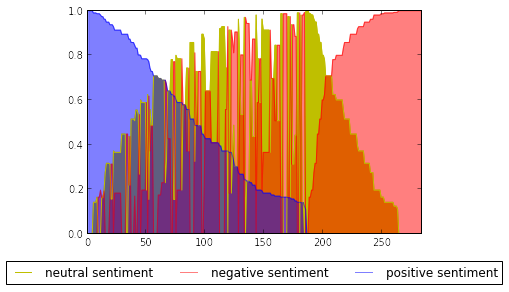

In [7]:
plt.plot(overallSentiment['Index'], overallSentiment['Neutral Sentiment'], color = 'y', lw = 1, label = "neutral sentiment")
plt.fill_between(overallSentiment['Index'], overallSentiment['Neutral Sentiment'], 0, where=overallSentiment['Index'], color='y')
plt.plot(overallSentiment['Index'], overallSentiment['Negative Sentiment'], color = 'r', lw = 1, label = "negative sentiment" , alpha='0.5')
plt.fill_between(overallSentiment['Index'], overallSentiment['Negative Sentiment'], 0, where=overallSentiment['Index'], color='r', alpha='0.5')
plt.plot(overallSentiment['Index'], overallSentiment['Positive Sentiment'], color = 'b', lw = 1, label = "positive sentiment", alpha='0.5')
plt.fill_between(overallSentiment['Index'], overallSentiment['Positive Sentiment'], 0, where=overallSentiment['Index'], color='b', alpha='0.5')
plt.xlim(0, len(overallSentiment['Index']))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)
#plt.savefig('sample.pdf')